In [ ]:
!pip install scikit-fuzzy

## **Import Library**

In [ ]:
# Bagian 1: Import Libraries yang Dibutuhkan
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## **Read CSV data tfidf**

In [ ]:
# Bagian 2: Membaca Dataset dan Menyiapkan Data
file_path = "data_100.csv"  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Pisahkan label dan fitur
labels = data['kategori']
features = data.drop('kategori', axis=1).values

# Encode label menjadi numerik untuk evaluasi akurasi
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


## **Fuzzy C-Means Clustering dan PCA**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from skfuzzy.cluster import cmeans

# Contoh dummy data (ganti ini dengan dataset Anda)
data = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': ['A', 'B', 'A', 'B'],  # Kolom non-numerik
    'feature3': ['FOTO: Melihat Kehancuran Gaza usai Satu Tahun Agresi Brutal Israel',
                 'Text 2', 'Text 3', 'Text 4'],  # String teks
    'label': [0, 1, 0, 1]  # Label target
})

# Pisahkan fitur dan label
features = data.drop(columns=['label'])  # Semua kecuali label
labels = data['label']  # Kolom label

# Identifikasi kolom non-numerik
non_numeric_columns = features.select_dtypes(exclude=['float', 'int']).columns
print("Kolom non-numerik:", non_numeric_columns)

# Ubah kolom non-numerik menjadi numerik menggunakan LabelEncoder
for col in non_numeric_columns:
    features[col] = LabelEncoder().fit_transform(features[col])

# Konversi DataFrame ke numpy array untuk kompatibilitas
features = features.values
encoded_labels = labels.values

# Fuzzy C-Means Clustering dan PCA
results = {}

# Tentukan dimensi maksimal (100 atau lebih kecil dari jumlah fitur)
max_dim = min(features.shape[1], 100)

for dim in range(max_dim, 1, -1):  # Dari dimensi maksimal hingga 2
    # Kurangi dimensi data menggunakan PCA
    pca = PCA(n_components=dim)
    reduced_features = pca.fit_transform(features)

    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data=reduced_features.T,
        c=2,                  # 2 clusters
        m=2.0,                # Tingkat fuzziness
        error=0.005,          # Toleransi error
        maxiter=1000          # Iterasi maksimum
    )

    # Keanggotaan cluster
    cluster_membership = np.argmax(u, axis=0)

    # Hitung akurasi berdasarkan label asli
    accuracy = max(
        accuracy_score(encoded_labels, cluster_membership),
        accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
    )

    # Simpan hasil
    results[dim] = {
        'pca_features': reduced_features,
        'centroids': cntr,
        'membership': cluster_membership,
        'accuracy': accuracy
    }

# Cetak hasil terbaik
best_dim = max(results, key=lambda x: results[x]['accuracy'])
print(f"Dimensi terbaik: {best_dim}, Akurasi: {results[best_dim]['accuracy']}")


Kolom non-numerik: Index(['feature2', 'feature3'], dtype='object')
Dimensi terbaik: 3, Akurasi: 0.5


## **Mencari Dimensi dengan Akurasi Terbaik**

In [ ]:
# 4. Mencari akurasi terbaik dan tampilkan hasil
best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
best_accuracy = results[best_dim]['accuracy']

# Cetak akurasi terbaik
print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")


Akurasi terbaik: 0.50 pada dimensi 3.


## **Scatter Plot untuk Dimensi Terbaik**

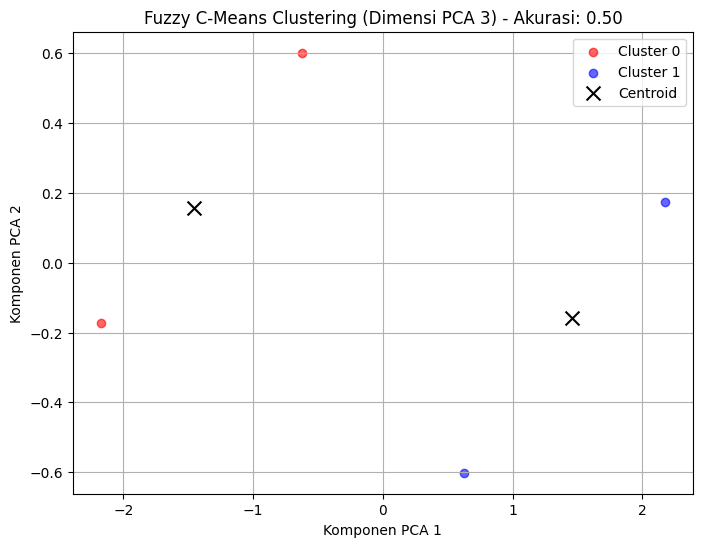

In [ ]:
# 5. Scatter plot untuk dimensi terbaik (2 dimensi)
final_result = results[best_dim]
pca_features = final_result['pca_features']
centroids = final_result['centroids']
membership = final_result['membership']
accuracy = final_result['accuracy']

# Scatter Plot untuk dimensi terbaik
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = pca_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA {best_dim}) - Akurasi: {accuracy:.2f}")
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.legend()
plt.grid()
plt.show()

## **Scatter Plot untuk Komponen 2**

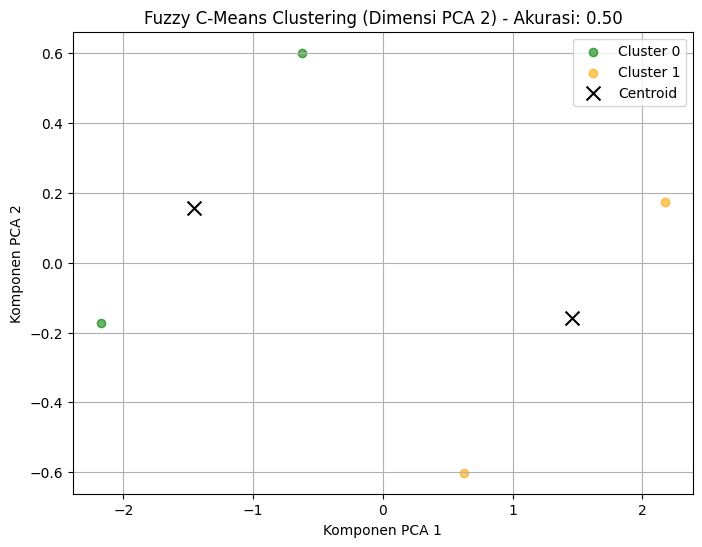

In [ ]:
# 6. Scatter plot untuk dimensi 2
final_result_2d = results[2]
pca_features_2d = final_result_2d['pca_features']
centroids_2d = final_result_2d['centroids']
membership_2d = final_result_2d['membership']
accuracy_2d = final_result_2d['accuracy']

# Scatter Plot untuk Dimensi 2
plt.figure(figsize=(8, 6))
colors = ['green', 'orange']
for i in range(2):  # Untuk 2 cluster
    cluster_points = pca_features_2d[membership_2d == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA 2) - Akurasi: {accuracy_2d:.2f}")
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.legend()
plt.grid()
plt.show()

## **Grafik Akurasi per Dimensi**

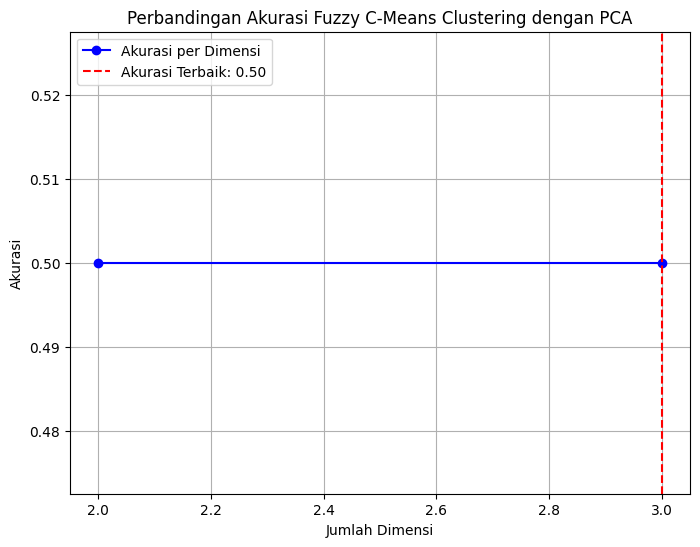

In [ ]:
# 7. Tampilkan grafik akurasi per dimensi
dim_list = list(results.keys())
accuracy_list = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(8, 6))
plt.plot(dim_list, accuracy_list, marker='o', color='b', linestyle='-', label="Akurasi per Dimensi")
plt.xlabel("Jumlah Dimensi")
plt.ylabel("Akurasi")
plt.title(f"Perbandingan Akurasi Fuzzy C-Means Clustering dengan PCA")
plt.axvline(best_dim, color='r', linestyle='--', label=f"Akurasi Terbaik: {best_accuracy:.2f}")
plt.legend()
plt.grid(True)
plt.show()

## **Akurasi untuk Setiap Komponen**

In [ ]:
# 8. Cetak akurasi untuk setiap dimensi
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")

Dimensi: 3, Akurasi: 0.50
Dimensi: 2, Akurasi: 0.50


yang ini ga nampilin grafik akurasi

Kolom non-numerik terdeteksi: Index(['judul', 'tanggal', 'isi'], dtype='object')


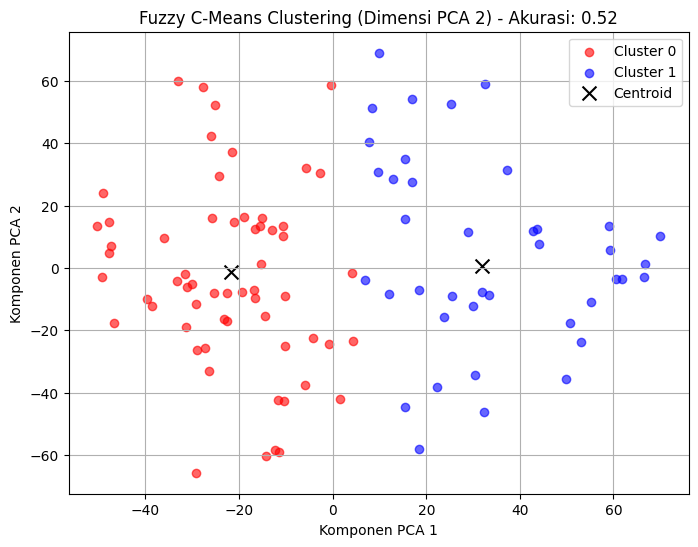

Dimensi: 3, Akurasi: 0.54
Dimensi: 2, Akurasi: 0.52


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Membaca dataset
file_path = "data_100.csv"
data = pd.read_csv(file_path)

# 2. Pisahkan label dan data fitur
labels = data['kategori']
features = data.drop('kategori', axis=1)

# Periksa kolom non-numerik
non_numeric_columns = features.select_dtypes(exclude=['float', 'int']).columns
if len(non_numeric_columns) > 0:
    print(f"Kolom non-numerik terdeteksi: {non_numeric_columns}")
    for col in non_numeric_columns:
        # Encode data non-numerik jika perlu
        features[col] = LabelEncoder().fit_transform(features[col].astype(str))

# Konversi ke numpy array
features = features.values

# Encode label kategori menjadi numerik untuk evaluasi akurasi
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Placeholder untuk hasil
results = {}

# 3. Fuzzy C-Means Clustering dan PCA untuk dimensi yang berbeda
max_dim = min(features.shape[1], 100)  # Membatasi dimensi maksimal dengan jumlah fitur (100)

for dim in range(max_dim, 1, -1):  # Mulai dari jumlah fitur penuh hingga 2 dimensi
    try:
        # Kurangi dimensi data
        pca = PCA(n_components=dim)
        reduced_features = pca.fit_transform(features)

        # Fuzzy C-Means Clustering
        cntr, u, u0, d, jm, p, fpc = cmeans(
            data=reduced_features.T,
            c=2,                  # 2 clusters
            m=2.0,                # Tingkat fuzziness
            error=0.005,          # Toleransi error
            maxiter=1000          # Iterasi maksimum
        )

        # Keanggotaan cluster
        cluster_membership = np.argmax(u, axis=0)

        # Hitung akurasi berdasarkan label asli
        accuracy = max(
            accuracy_score(encoded_labels, cluster_membership),
            accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
        )

        # Simpan hasil
        results[dim] = {
            'pca_features': reduced_features,
            'centroids': cntr,
            'membership': cluster_membership,
            'accuracy': accuracy
        }
    except ValueError as e:
        print(f"Error pada dimensi {dim}: {e}")
        continue

# 4. Scatter plot untuk dimensi terakhir (2 dimensi)
if 2 in results:
    final_result = results[2]
    pca_features = final_result['pca_features']
    centroids = final_result['centroids']
    membership = final_result['membership']
    accuracy = final_result['accuracy']

    # Scatter Plot
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue']
    for i in range(2):  # Untuk 2 cluster
        cluster_points = pca_features[membership == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

    # Tambahkan centroid
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
    plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA 2) - Akurasi: {accuracy:.2f}")
    plt.xlabel("Komponen PCA 1")
    plt.ylabel("Komponen PCA 2")
    plt.legend()
    plt.grid()
    plt.show()

# 5. Cetak akurasi untuk setiap dimensi
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")


yang ini nampilin grafik akurasi cuma plot dimensi = 2

Kolom non-numerik terdeteksi: Index(['judul', 'tanggal', 'isi'], dtype='object')
Menghapus kolom non-numerik: Index(['judul', 'tanggal', 'isi'], dtype='object')
Tidak ada hasil yang valid.


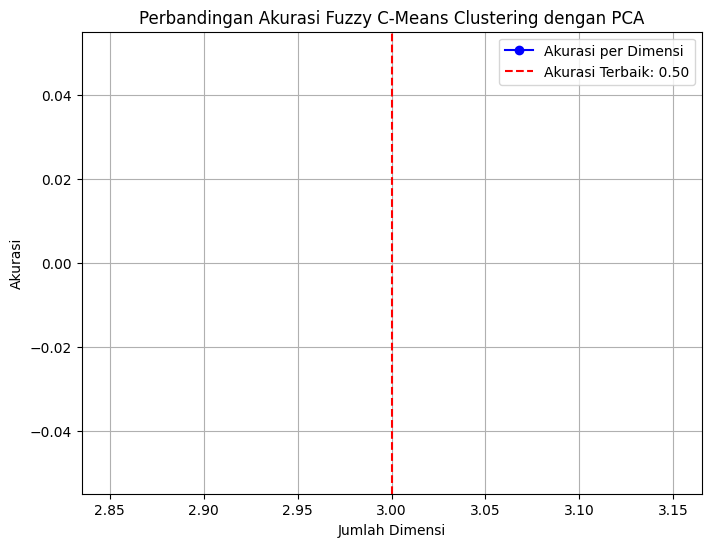

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Membaca dataset
file_path = "data_100.csv"
data = pd.read_csv(file_path)

# 2. Pisahkan label dan data fitur
labels = data['kategori']
features = data.drop('kategori', axis=1)

# 3. Proses kolom non-numerik
non_numeric_columns = features.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print(f"Kolom non-numerik terdeteksi: {non_numeric_columns}")
    # Opsional: Hapus kolom non-numerik yang tidak relevan
    features = features.drop(columns=non_numeric_columns)
    print(f"Menghapus kolom non-numerik: {non_numeric_columns}")
else:
    print("Tidak ada kolom non-numerik.")

# Konversi data ke tipe numerik
features = features.apply(pd.to_numeric, errors='coerce')
# Hilangkan baris dengan nilai NaN akibat konversi
features = features.dropna()

# Konversi ke array numpy
features = features.values

# Encode label kategori menjadi numerik untuk evaluasi akurasi
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Placeholder untuk hasil
results = {}

# 4. Fuzzy C-Means Clustering dan PCA untuk dimensi yang berbeda
max_dim = min(features.shape[1], 100)  # Membatasi dimensi maksimal dengan jumlah fitur (100)

for dim in range(max_dim, 1, -1):  # Mulai dari jumlah fitur penuh hingga 2 dimensi
    try:
        # Kurangi dimensi data
        pca = PCA(n_components=dim)
        reduced_features = pca.fit_transform(features)

        # Fuzzy C-Means Clustering
        cntr, u, u0, d, jm, p, fpc = cmeans(
            data=reduced_features.T,
            c=2,                  # 2 clusters
            m=2.0,                # Tingkat fuzziness
            error=0.005,          # Toleransi error
            maxiter=1000          # Iterasi maksimum
        )

        # Keanggotaan cluster
        cluster_membership = np.argmax(u, axis=0)

        # Hitung akurasi berdasarkan label asli
        accuracy = max(
            accuracy_score(encoded_labels, cluster_membership),
            accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
        )

        # Simpan hasil
        results[dim] = {
            'pca_features': reduced_features,
            'centroids': cntr,
            'membership': cluster_membership,
            'accuracy': accuracy
        }
    except ValueError as e:
        print(f"Error pada dimensi {dim}: {e}")
        continue

# 5. Mencari akurasi terbaik dan tampilkan hasil
if results:
    best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
    best_accuracy = results[best_dim]['accuracy']
    print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")
else:
    print("Tidak ada hasil yang valid.")

# 6. Scatter plot untuk dimensi terakhir (2 dimensi)
if 2 in results:
    final_result = results[2]
    pca_features = final_result['pca_features']
    centroids = final_result['centroids']
    membership = final_result['membership']
    accuracy = final_result['accuracy']

    # Scatter Plot
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue']
    for i in range(2):  # Untuk 2 cluster
        cluster_points = pca_features[membership == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

    # Tambahkan centroid
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
    plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA 2) - Akurasi: {accuracy:.2f}")
    plt.xlabel("Komponen PCA 1")
    plt.ylabel("Komponen PCA 2")
    plt.legend()
    plt.grid()
    plt.show()

# 7. Tampilkan grafik akurasi per dimensi
dim_list = list(results.keys())
accuracy_list = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(8, 6))
plt.plot(dim_list, accuracy_list, marker='o', color='b', linestyle='-', label="Akurasi per Dimensi")
plt.xlabel("Jumlah Dimensi")
plt.ylabel("Akurasi")
plt.title(f"Perbandingan Akurasi Fuzzy C-Means Clustering dengan PCA")
plt.axvline(best_dim, color='r', linestyle='--', label=f"Akurasi Terbaik: {best_accuracy:.2f}")
plt.legend()
plt.grid(True)
plt.show()

# 8. Cetak akurasi untuk setiap dimensi
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")


yang ini nampilin plot akurasi terbaik

Kolom non-numerik terdeteksi: Index(['judul', 'tanggal', 'isi'], dtype='object')
Menghapus kolom non-numerik: Index(['judul', 'tanggal', 'isi'], dtype='object')
Tidak ada hasil yang valid.


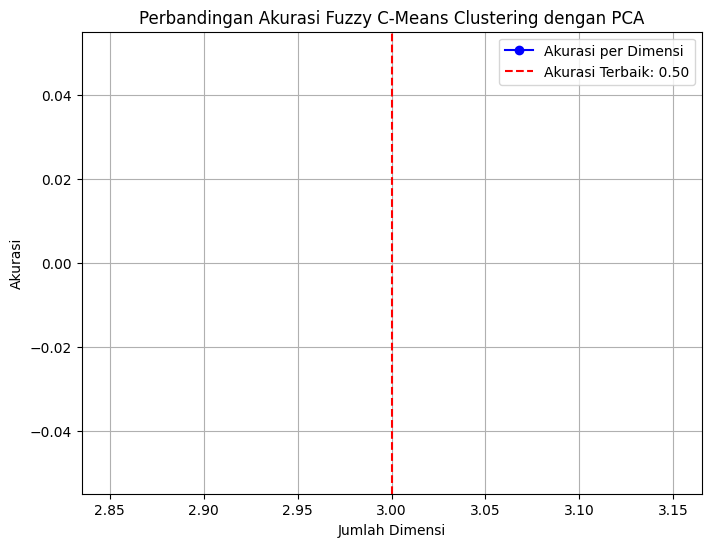

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Membaca dataset
file_path = "data_100.csv"
data = pd.read_csv(file_path)

# 2. Pisahkan label dan data fitur
labels = data['kategori']
features = data.drop('kategori', axis=1)

# 3. Proses kolom non-numerik
non_numeric_columns = features.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print(f"Kolom non-numerik terdeteksi: {non_numeric_columns}")
    # Opsional: Hapus kolom non-numerik yang tidak relevan
    features = features.drop(columns=non_numeric_columns)
    print(f"Menghapus kolom non-numerik: {non_numeric_columns}")
else:
    print("Tidak ada kolom non-numerik.")

# Konversi data ke tipe numerik
features = features.apply(pd.to_numeric, errors='coerce')
# Hilangkan baris dengan nilai NaN akibat konversi
features = features.dropna()

# Konversi ke array numpy
features = features.values

# Encode label kategori menjadi numerik untuk evaluasi akurasi
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Placeholder untuk hasil
results = {}

# 4. Fuzzy C-Means Clustering dan PCA untuk dimensi yang berbeda
max_dim = min(features.shape[1], 100)  # Membatasi dimensi maksimal dengan jumlah fitur (100)

for dim in range(max_dim, 1, -1):  # Mulai dari jumlah fitur penuh hingga 2 dimensi
    try:
        # Kurangi dimensi data
        pca = PCA(n_components=dim)
        reduced_features = pca.fit_transform(features)

        # Fuzzy C-Means Clustering
        cntr, u, u0, d, jm, p, fpc = cmeans(
            data=reduced_features.T,
            c=2,                  # 2 clusters
            m=2.0,                # Tingkat fuzziness
            error=0.005,          # Toleransi error
            maxiter=1000          # Iterasi maksimum
        )

        # Keanggotaan cluster
        cluster_membership = np.argmax(u, axis=0)

        # Hitung akurasi berdasarkan label asli
        accuracy = max(
            accuracy_score(encoded_labels, cluster_membership),
            accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
        )

        # Simpan hasil
        results[dim] = {
            'pca_features': reduced_features,
            'centroids': cntr,
            'membership': cluster_membership,
            'accuracy': accuracy
        }
    except ValueError as e:
        print(f"Error pada dimensi {dim}: {e}")
        continue

# 5. Mencari akurasi terbaik dan tampilkan hasil
if results:
    best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
    best_accuracy = results[best_dim]['accuracy']
    print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")
else:
    print("Tidak ada hasil yang valid.")

# 6. Scatter plot untuk dimensi terakhir (2 dimensi)
if 2 in results:
    final_result = results[2]
    pca_features = final_result['pca_features']
    centroids = final_result['centroids']
    membership = final_result['membership']
    accuracy = final_result['accuracy']

    # Scatter Plot
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue']
    for i in range(2):  # Untuk 2 cluster
        cluster_points = pca_features[membership == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

    # Tambahkan centroid
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
    plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA 2) - Akurasi: {accuracy:.2f}")
    plt.xlabel("Komponen PCA 1")
    plt.ylabel("Komponen PCA 2")
    plt.legend()
    plt.grid()
    plt.show()

# 7. Tampilkan grafik akurasi per dimensi
dim_list = list(results.keys())
accuracy_list = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(8, 6))
plt.plot(dim_list, accuracy_list, marker='o', color='b', linestyle='-', label="Akurasi per Dimensi")
plt.xlabel("Jumlah Dimensi")
plt.ylabel("Akurasi")
plt.title(f"Perbandingan Akurasi Fuzzy C-Means Clustering dengan PCA")
plt.axvline(best_dim, color='r', linestyle='--', label=f"Akurasi Terbaik: {best_accuracy:.2f}")
plt.legend()
plt.grid(True)
plt.show()

# 8. Cetak akurasi untuk setiap dimensi
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")


yang ini nampilin plot akurasi terbaik dan plot dimensi = 2

<ipython-input-18-57bac99861a0>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tanggal'] = pd.to_datetime(data['tanggal'], errors='coerce')  # Ubah tanggal menjadi numerik (timestamp)


Akurasi terbaik: 0.97 pada dimensi 23.


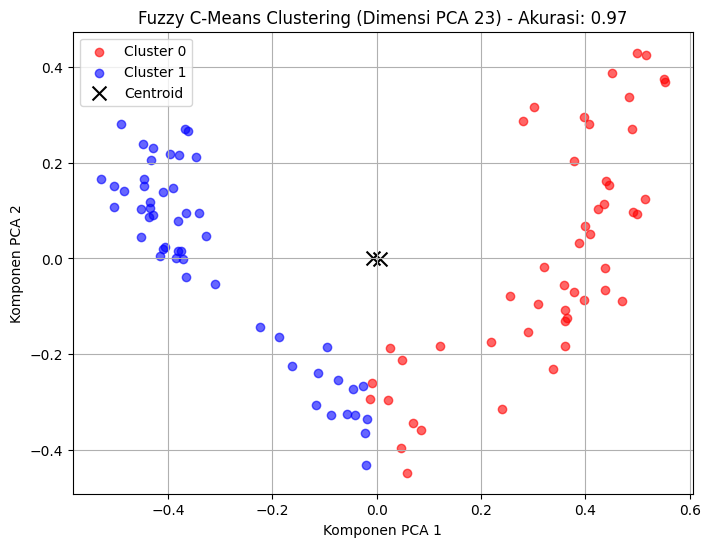

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Membaca dataset
file_path = "data_100.csv"
data = pd.read_csv(file_path)

# 2. Tangani data non-numerik
# Konversi teks (judul, isi) menjadi fitur numerik menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Maksimal 100 fitur
tfidf_features = tfidf_vectorizer.fit_transform(data['isi'].fillna('')).toarray()

# Gabungkan fitur TF-IDF dengan data numerik lainnya
data['tanggal'] = pd.to_datetime(data['tanggal'], errors='coerce')  # Ubah tanggal menjadi numerik (timestamp)
data['tanggal'] = data['tanggal'].map(lambda x: x.timestamp() if pd.notnull(x) else 0)  # Isi NaT dengan 0

# Gabungkan semua fitur
features = np.hstack([
    tfidf_features,
    data.drop(['judul', 'isi', 'kategori'], axis=1).select_dtypes(include=[np.number]).values
])

# Pisahkan label
labels = data['kategori']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Placeholder untuk hasil
results = {}

# 3. Fuzzy C-Means Clustering dan PCA untuk dimensi yang berbeda
max_dim = min(features.shape[1], 100)  # Maksimal dimensi

for dim in range(max_dim, 1, -1):  # Mulai dari jumlah fitur penuh hingga 2 dimensi
    # Kurangi dimensi data
    pca = PCA(n_components=dim)
    reduced_features = pca.fit_transform(features)

    # Fuzzy C-Means Clustering
    try:
        cntr, u, u0, d, jm, p, fpc = cmeans(
            data=reduced_features.T,
            c=2,                  # 2 clusters
            m=2.0,                # Tingkat fuzziness
            error=0.005,          # Toleransi error
            maxiter=1000          # Iterasi maksimum
        )

        # Keanggotaan cluster
        cluster_membership = np.argmax(u, axis=0)

        # Hitung akurasi berdasarkan label asli
        accuracy = max(
            accuracy_score(encoded_labels, cluster_membership),
            accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
        )

        # Simpan hasil
        results[dim] = {
            'pca_features': reduced_features,
            'centroids': cntr,
            'membership': cluster_membership,
            'accuracy': accuracy
        }
    except Exception as e:
        print(f"Clustering gagal untuk dimensi {dim}: {e}")
        continue

# 4. Validasi hasil
if results:
    best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
    best_accuracy = results[best_dim]['accuracy']

    print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")

    # Scatter Plot untuk dimensi terbaik
    final_result = results[best_dim]
    pca_features = final_result['pca_features']
    centroids = final_result['centroids']
    membership = final_result['membership']
    accuracy = final_result['accuracy']

    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue']
    for i in range(2):  # Untuk 2 cluster
        cluster_points = pca_features[membership == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
    plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA {best_dim}) - Akurasi: {accuracy:.2f}")
    plt.xlabel("Komponen PCA 1")
    plt.ylabel("Komponen PCA 2")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Tidak ada hasil clustering yang valid.")


<ipython-input-24-eee2cd0ffb12>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tanggal'] = pd.to_datetime(data['tanggal'], errors='coerce')  # Ubah tanggal ke timestamp


Akurasi terbaik: 0.51 pada dimensi 2 dengan 3 cluster.


<ipython-input-24-eee2cd0ffb12>:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', best_cluster_count)


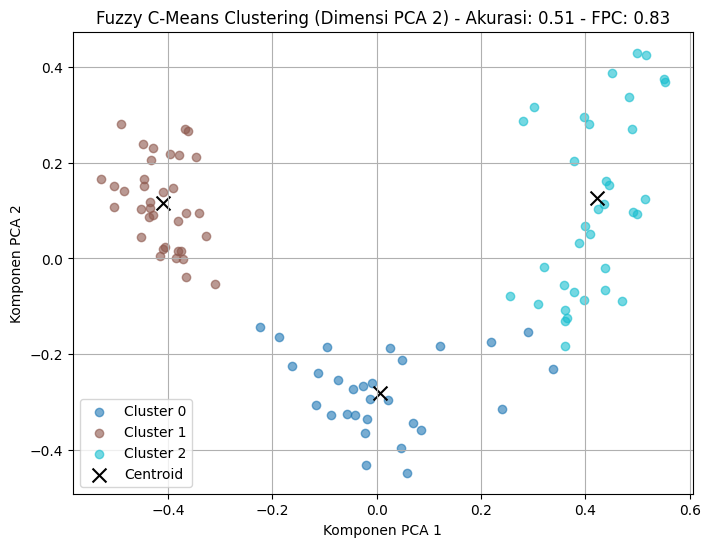

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# 1. Membaca dataset
file_path = "data_100.csv"
data = pd.read_csv(file_path)

# 2. Tangani data non-numerik
# Konversi teks (contoh: kolom 'judul' dan 'isi') menjadi fitur numerik menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Maksimum 100 fitur
tfidf_features = tfidf_vectorizer.fit_transform(data['isi'].fillna('')).toarray()

# Encode label kategori menjadi numerik
labels = data['kategori']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tangani kolom tanggal
if 'tanggal' in data.columns:
    data['tanggal'] = pd.to_datetime(data['tanggal'], errors='coerce')  # Ubah tanggal ke timestamp
    data['tanggal'] = data['tanggal'].map(lambda x: x.timestamp() if pd.notnull(x) else 0)  # Isi NaT dengan 0
else:
    print("Kolom 'tanggal' tidak ditemukan. Mengisi nilai default 0.")
    data['tanggal'] = 0

# Pilih semua kolom numerik
numerical_features = data.select_dtypes(include=[np.number])

# Gabungkan semua fitur menjadi matriks numerik
features = np.hstack([tfidf_features, numerical_features.values])

# Placeholder untuk hasil
results = []

# 3. Fuzzy C-Means Clustering dan PCA untuk dimensi yang berbeda
max_dim = min(features.shape[1], 100)  # Membatasi dimensi maksimal dengan jumlah fitur (100)

# Mencari jumlah cluster terbaik
best_fpc = -1
best_cluster_count = 2
best_accuracy = 0
best_dim = 2

for dim in range(max_dim, 1, -1):  # Mulai dari jumlah fitur penuh hingga 2 dimensi
    # Kurangi dimensi data
    pca = PCA(n_components=dim)
    reduced_features = pca.fit_transform(features)

    # Coba berbagai jumlah cluster (misalnya dari 2 hingga 6)
    for c in range(2, 7):
        # Fuzzy C-Means Clustering
        try:
            cntr, u, u0, d, jm, p, fpc = cmeans(
                data=reduced_features.T,
                c=c,
                m=2.0,
                error=0.005,
                maxiter=1000
            )
        except Exception as e:
            print(f"Clustering gagal untuk dimensi {dim} dengan {c} cluster: {e}")
            continue

        # Keanggotaan cluster
        cluster_membership = np.argmax(u, axis=0)

        # Hitung akurasi berdasarkan label asli
        accuracy = max(
            accuracy_score(encoded_labels, cluster_membership),
            accuracy_score(encoded_labels, 1 - cluster_membership)
        )

        # Simpan hasil untuk setiap percobaan
        results.append({
            'dim': dim,
            'clusters': c,
            'pca_features': reduced_features,
            'centroids': cntr,
            'membership': cluster_membership,
            'accuracy': accuracy,
            'fpc': fpc
        })

        # Simpan hasil jika FPC lebih baik
        if fpc > best_fpc:
            best_fpc = fpc
            best_accuracy = accuracy
            best_cluster_count = c
            best_dim = dim

# 4. Mencari akurasi terbaik dan tampilkan hasil
print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim} dengan {best_cluster_count} cluster.")

# 5. Scatter plot untuk dimensi terbaik
best_result = next(result for result in results if result['dim'] == best_dim and result['clusters'] == best_cluster_count)
pca_features = best_result['pca_features']
centroids = best_result['centroids']
membership = best_result['membership']
accuracy = best_result['accuracy']

# Scatter Plot
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', best_cluster_count)
for i in range(best_cluster_count):
    cluster_points = pca_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors(i)], label=f'Cluster {i}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA {best_dim}) - Akurasi: {accuracy:.2f} - FPC: {best_fpc:.2f}")
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.legend()
plt.grid()
plt.show()


# **Pake SVD**

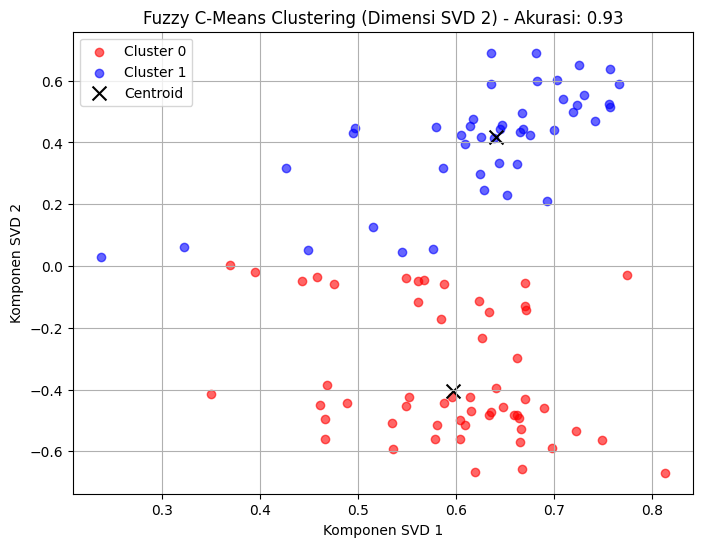

Dimensi: 200, Akurasi: 0.93
Dimensi: 199, Akurasi: 0.92
Dimensi: 198, Akurasi: 0.94
Dimensi: 197, Akurasi: 0.92
Dimensi: 196, Akurasi: 0.93
Dimensi: 195, Akurasi: 0.94
Dimensi: 194, Akurasi: 0.93
Dimensi: 193, Akurasi: 0.93
Dimensi: 192, Akurasi: 0.89
Dimensi: 191, Akurasi: 0.93
Dimensi: 190, Akurasi: 0.94
Dimensi: 189, Akurasi: 0.93
Dimensi: 188, Akurasi: 0.91
Dimensi: 187, Akurasi: 0.94
Dimensi: 186, Akurasi: 0.95
Dimensi: 185, Akurasi: 0.93
Dimensi: 184, Akurasi: 0.92
Dimensi: 183, Akurasi: 0.85
Dimensi: 182, Akurasi: 0.94
Dimensi: 181, Akurasi: 0.93
Dimensi: 180, Akurasi: 0.95
Dimensi: 179, Akurasi: 0.94
Dimensi: 178, Akurasi: 0.93
Dimensi: 177, Akurasi: 0.94
Dimensi: 176, Akurasi: 0.93
Dimensi: 175, Akurasi: 0.71
Dimensi: 174, Akurasi: 0.92
Dimensi: 173, Akurasi: 0.93
Dimensi: 172, Akurasi: 0.93
Dimensi: 171, Akurasi: 0.93
Dimensi: 170, Akurasi: 0.64
Dimensi: 169, Akurasi: 0.92
Dimensi: 168, Akurasi: 0.93
Dimensi: 167, Akurasi: 0.94
Dimensi: 166, Akurasi: 0.85
Dimensi: 165, Akuras

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# 1. Membaca dataset
file_path = "data_100.csv"
data = pd.read_csv(file_path)

# 2. Pisahkan label dan tangani data non-numerik
labels = data['kategori']
data = data.drop('kategori', axis=1)

# Konversi teks menjadi fitur numerik menggunakan TF-IDF (contoh: kolom teks seperti 'judul' atau 'isi')
text_columns = ['judul', 'isi']  # Kolom teks dalam dataset
tfidf_features_list = []

for col in text_columns:
    if col in data.columns:
        tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Maksimum 100 fitur per kolom
        tfidf_features = tfidf_vectorizer.fit_transform(data[col].fillna('')).toarray()
        tfidf_features_list.append(tfidf_features)
        data = data.drop(col, axis=1)  # Hapus kolom setelah diproses

# Gabungkan semua fitur TF-IDF
if tfidf_features_list:
    tfidf_features = np.hstack(tfidf_features_list)
else:
    tfidf_features = np.empty((data.shape[0], 0))  # Jika tidak ada kolom teks, gunakan array kosong

# Gabungkan semua data numerik dengan TF-IDF
numerical_features = data.select_dtypes(include=[np.number]).fillna(0).values
features = np.hstack([tfidf_features, numerical_features])

# Encode label kategori menjadi numerik untuk evaluasi akurasi
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Placeholder untuk hasil
results = {}

# 3. Fuzzy C-Means Clustering dan SVD untuk dimensi yang berbeda
for dim in range(features.shape[1], 1, -1):  # Mulai dari jumlah fitur penuh hingga 2 dimensi
    # Kurangi dimensi data
    svd = TruncatedSVD(n_components=dim)
    reduced_features = svd.fit_transform(features)

    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data=reduced_features.T,
        c=2,                  # 2 clusters
        m=2.0,                # Tingkat fuzziness
        error=0.005,          # Toleransi error
        maxiter=1000          # Iterasi maksimum
    )

    # Keanggotaan cluster
    cluster_membership = np.argmax(u, axis=0)

    # Hitung akurasi berdasarkan label asli
    accuracy = max(
        accuracy_score(encoded_labels, cluster_membership),
        accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
    )

    # Simpan hasil
    results[dim] = {
        'svd_features': reduced_features,
        'centroids': cntr,
        'membership': cluster_membership,
        'accuracy': accuracy
    }

# 4. Scatter plot untuk dimensi terakhir (2 dimensi)
final_result = results[2]
svd_features = final_result['svd_features']
centroids = final_result['centroids']
membership = final_result['membership']
accuracy = final_result['accuracy']

# Scatter Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD 2) - Akurasi: {accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()

# 5. Cetak akurasi untuk setiap dimensi
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")


In [ ]:
# 4. Mencari akurasi terbaik dan tampilkan hasil
best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
best_accuracy = results[best_dim]['accuracy']

# Cetak akurasi terbaik
print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")


Akurasi terbaik: 0.97 pada dimensi 145.


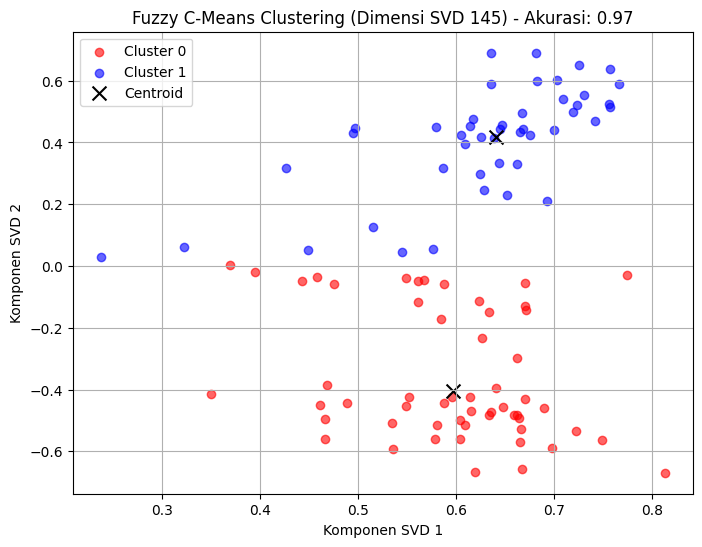

In [ ]:
# Scatter Plot untuk dimensi terbaik
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD {best_dim}) - Akurasi: {best_accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()


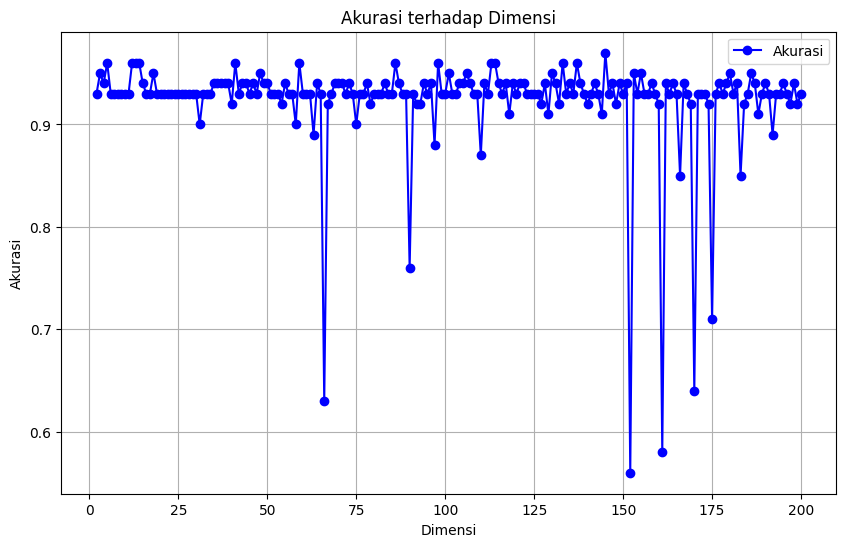

Dimensi dengan akurasi terbaik: 145
Akurasi terbaik: 0.97


In [ ]:
# 5. Cetak akurasi untuk setiap dimensi
accuracies = [result['accuracy'] for result in results.values()]
dimensions = list(results.keys())

# Plot akurasi terhadap dimensi
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies, marker='o', color='b', linestyle='-', label="Akurasi")
plt.xlabel('Dimensi')
plt.ylabel('Akurasi')
plt.title('Akurasi terhadap Dimensi')
plt.grid(True)
plt.legend()
plt.show()

# 6. Menampilkan dimensi dan akurasi terbaik
print(f"Dimensi dengan akurasi terbaik: {best_dim}")
print(f"Akurasi terbaik: {best_accuracy:.2f}")